## UNC - Fin Tech Homework NLP
## Nate Walker

In [5]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = 'c7825a5cbc5240d2a9245f8ec5ccc703'

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_top_headlines(q="Bitcoin", language="en", country="us")
bitcoin_headlines['status']

'ok'

In [29]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q=" ethereum", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about  Ethereum: { ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about  Ethereum: 918


{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘Daily Ethereum network fees surpass Bitcoin’s’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Schopenhauer used to say: Do what you love…',
 'url': 'https://thenextweb.com/hardfork/2020/06/08/satoshi-nakaboto-daily-ethereum-network-fees-surpass-bitcoins/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2020-06-08T08:38:44Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Tod

In [16]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3604


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Jack Morse',
 'title': 'J.K. Rowling is four cocktails in and talking trash about Bitcoin',
 'description': "J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\nNoted TERF and author of The Cuckoo’s Calling, Rowling decided Friday was the perfect time to learn about the cryptocurrency Bitcoin. And so, like any celebrity wh…",
 'url': 'https://mashable.com/article/jk-rowling-asked-twitter-about-bitcoin/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F05%252F16%252Fed%252F65127486efd14faea068927124f3b1ee.253ab.jpg%252F1200x630.jpg?signature=XjJ4aqKaX56MW5k29Zn1ygz0Evc=',
 'publishedAt': '2020-05-16T00:34:00Z',
 'content': "J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]"}

In [18]:
# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"]

Total articles about bitcoin: 3604


[{'source': {'id': 'mashable', 'name': 'Mashable'},
  'author': 'Jack Morse',
  'title': 'J.K. Rowling is four cocktails in and talking trash about Bitcoin',
  'description': "J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\nNoted TERF and author of The Cuckoo’s Calling, Rowling decided Friday was the perfect time to learn about the cryptocurrency Bitcoin. And so, like any celebrity wh…",
  'url': 'https://mashable.com/article/jk-rowling-asked-twitter-about-bitcoin/',
  'urlToImage': 'https://mondrian.mashable.com/2020%252F05%252F16%252Fed%252F65127486efd14faea068927124f3b1ee.253ab.jpg%252F1200x630.jpg?signature=XjJ4aqKaX56MW5k29Zn1ygz0Evc=',
  'publishedAt': '2020-05-16T00:34:00Z',
  'content': "J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]"},
 {'source': {'id': None, '

In [22]:
# Create the Bitcoin DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])

bitcoin_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Jack Morse,J.K. Rowling has been drinking a lot and you'd...,J.K. Rowling has been drinking a lot and you'd...,2020-05-16T00:34:00Z,"{'id': 'mashable', 'name': 'Mashable'}",J.K. Rowling is four cocktails in and talking ...,https://mashable.com/article/jk-rowling-asked-...,https://mondrian.mashable.com/2020%252F05%252F...
1,Tom McKay,The Winklevoss twinsthe brothers Mark Zuckerbe...,The Winklevoss twins—the brothers Mark Zuckerb...,2020-06-09T23:45:00Z,"{'id': None, 'name': 'Gizmodo.com'}","God Help Us, the Winklevoss Twins Are Co-Produ...",https://gizmodo.com/god-help-us-the-winklevoss...,https://i.kinja-img.com/gawker-media/image/upl...
2,Alex Wilhelm,Over the last few weeks all eyes in the crypto...,Over the last few weeks all eyes in the crypto...,2020-05-13T15:46:38Z,"{'id': 'techcrunch', 'name': 'TechCrunch'}",FalconX raises $17M to power its crypto tradin...,http://techcrunch.com/2020/05/13/falconx-raise...,https://techcrunch.com/wp-content/uploads/2019...
3,David Murphy,If youre planning to do some protesting and yo...,If you’re planning to do some protesting and y...,2020-06-04T19:00:00Z,"{'id': None, 'name': 'Lifehacker.com'}",How to Buy a Burner Phone,https://lifehacker.com/how-to-buy-a-burner-pho...,https://i.kinja-img.com/gawker-media/image/upl...
4,BeauHD,Since the first Bitcoin block was generated ba...,The most anticipated cryptocurrency event of 2...,2020-05-11T20:45:00Z,"{'id': None, 'name': 'Slashdot.org'}",It Happened: Bitcoin Just Experienced Third Ha...,https://news.slashdot.org/story/20/05/11/20312...,https://a.fsdn.com/sd/topics/bitcoin_64.png


## Create the Bitcoin Sentiment Scores DataFrame

In [27]:
# Create the Bitcoin Sentiment Scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()  # Original order of columns


,compound,date,negative,neutral,positive,text
0,0.7650,2020-05-16,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,2020-06-09,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,0.0000,2020-05-13,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
3,-0.3464,2020-06-04,0.134,0.819,0.046,If youre planning to do some protesting and yo...
4,-0.5859,2020-05-11,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...


## Create the Ethereum Sentiment Scores DataFrame

In [31]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()  # Original order of columns


,compound,date,negative,neutral,positive,text
0,0.5070,2020-06-08,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,2020-05-20,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,2020-06-03,0.000,1.000,0.000,For developers looking to quickly build identi...
3,0.6249,2020-05-14,0.000,0.859,0.141,Use this to send Ether from one account to ano...
4,-0.4457,2020-05-24,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."


In [32]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.244663,0.021895,0.911842,0.066158
std,0.409451,0.045818,0.057773,0.056865
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.894500,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [33]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,15.000000,15.000000,15.000000,15.000000
mean,0.274887,0.018933,0.897400,0.083533
std,0.347588,0.043444,0.100329,0.085977
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.871500,0.015500
50%,0.318200,0.000000,0.910000,0.089000
75%,0.507000,0.000000,0.971500,0.102500
max,0.919800,0.148000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.084 vs 0.066 for bitcoin

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.92 vs 0.80 for bitcoin

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.34 vs 0.19 for bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [34]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [47]:
lemmatizer = WordNetLemmatizer()

## NLTK tokenization

In [144]:
# Expand the default stopwords list if necessary
sw_addon = {'said', 'mln', 'kilolitres','kl', 'ha', 'ho', 'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [83]:
bitcoin_df.head()
bitcoin_df.tail()
#ethereum_df.head()

,compound,date,negative,neutral,positive,text
14,0.507,2020-05-27,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
15,0.507,2020-06-03,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
16,0.507,2020-06-09,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
17,0.507,2020-05-14,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
18,0.507,2020-05-11,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...


## Get the Text Column only from the Data Frame

In [129]:
# First Row Article
article = bitcoin_df["text"][2]
article

'Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]'

In [130]:
# All text articles
articles = bitcoin_df["text"][:]
print(articles)


0     J.K. Rowling has been drinking a lot and you'd...
1     The Winklevoss twinsthe brothers Mark Zuckerbe...
2     Over the last few weeks all eyes in the crypto...
3     If youre planning to do some protesting and yo...
4     Since the first Bitcoin block was generated ba...
5     Reuters\r\n<ul><li>Goldman Sachs gave five rea...
6     <ul><li>Famed investor Michael Novogratz tweet...
7     Our robot colleague Satoshi Nakaboto writes ab...
8     The move is the latest in a string of positive...
9     Our robot colleague Satoshi Nakaboto writes ab...
10    Opinions expressed by Entrepreneur contributor...
11    Bitcoin has always had the potential to become...
12    Our robot colleague Satoshi Nakaboto writes ab...
13    Our robot colleague Satoshi Nakaboto writes ab...
14    Our robot colleague Satoshi Nakaboto writes ab...
15    Our robot colleague Satoshi Nakaboto writes ab...
16    Our robot colleague Satoshi Nakaboto writes ab...
17    Our robot colleague Satoshi Nakaboto write

In [131]:
import nltk
nltk.download('punkt')

# Now using NLTK's sent_tokenize function
sent_tokenize(article)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnalyticsStudent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm.',
 'Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]']

In [132]:
# define stopwording and regex 
def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

In [133]:
# Clean Text Article Row 0
result = clean_text(article)
result

['last',
 'weeks',
 'eyes',
 'crypto',
 'world',
 'glued',
 'halvening',
 'nighreligious',
 'moment',
 'blockchain',
 'realm',
 'every',
 'amount',
 'new',
 'bitcoin',
 'mined',
 'distri',
 'chars']

In [136]:
sentence = sent_tokenize(article)[0]
print(sentence)

Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm.


In [137]:
words = word_tokenize(sentence) 
print(words)

['Over', 'the', 'last', 'few', 'weeks', 'all', 'eyes', 'in', 'the', 'crypto', 'world', 'have', 'been', 'glued', 'to', 'the', 'halvening', ',', 'a', 'nigh-religious', 'moment', 'in', 'the', 'blockchain', 'realm', '.']


In [100]:
# NLTK list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [138]:
sw = set(stopwords.words('english'))
first_result = [word.lower() for word in words if word.lower() not in sw]

In [139]:
print(first_result)

['last', 'weeks', 'eyes', 'crypto', 'world', 'glued', 'halvening', ',', 'nigh-religious', 'moment', 'blockchain', 'realm', '.']


In [142]:
# We can define our own list of stopwords to add to the default nltk words
sw_addon = {'said', ',', '+','[', ']', '...', '.', '+2124', 'notedterf','about…' } 
second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]

In [143]:
print(second_result)

['last', 'weeks', 'eyes', 'crypto', 'world', 'glued', 'halvening', 'nigh-religious', 'moment', 'blockchain', 'realm']


In [13]:
# Expand the default stopwords list if necessary

In [145]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


## Create New Tokens Column as a new List

In [146]:
# Create a new tokens column for bitcoin
bitcoin_df['Tokens'] = [tokenizer(x) for x in bitcoin_df['text']]
bitcoin_df.head()

,compound,date,negative,neutral,positive,text,Tokens
0,0.7650,2020-05-16,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.0000,2020-06-09,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,0.0000,2020-05-13,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, eye, crypto, world, glued, halvening, n..."
3,-0.3464,2020-06-04,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
4,-0.5859,2020-05-11,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...,"[since, first, bitcoin, block, wa, generated, ..."


In [147]:
# Create a new tokens column for ethereum
ethereum_df['Tokens'] = [tokenizer(y) for y in ethereum_df['text']]
ethereum_df.head()

,compound,date,negative,neutral,positive,text,Tokens
0,0.5070,2020-06-08,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,2020-05-20,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
2,0.0000,2020-06-03,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.6249,2020-05-14,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
4,-0.4457,2020-05-24,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [149]:
from collections import Counter
from nltk import ngrams

In [150]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [btc for bits in bitcoin_df.Tokens for btc in bits]
bigram_counts = Counter(ngrams(btc_tokens, n=2))
bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 18),
 (('char', 'robot'), 9),
 (('robot', 'colleague'), 9),
 (('colleague', 'satoshi'), 9),
 (('nakaboto', 'writes'), 9),
 (('writes', 'bitcoin'), 9),
 (('every', 'fucking'), 9),
 (('fucking', 'daywelcome'), 9),
 (('daywelcome', 'another'), 9),
 (('another', 'edition'), 9),
 (('edition', 'bitcoin'), 9),
 (('bitcoin', 'satoshi'), 9),
 (('nakaboto', 'tell'), 9),
 (('tell', 'whats'), 9),
 (('whats', 'going'), 9),
 (('going', 'bitcoin'), 9),
 (('bitcoin', 'char'), 9),
 (('bitcoin', 'btc'), 8),
 (('btc', 'every'), 8),
 (('year', 'bitcoin'), 2)]

In [151]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [eth for eths in ethereum_df.Tokens for eth in eths]
bigram_counts = Counter(ngrams(eth_tokens, n=2))
bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 6),
 (('robot', 'colleague'), 3),
 (('colleague', 'satoshi'), 3),
 (('nakaboto', 'writes'), 3),
 (('writes', 'bitcoin'), 3),
 (('bitcoin', 'btc'), 3),
 (('btc', 'every'), 3),
 (('every', 'fucking'), 3),
 (('fucking', 'daywelcome'), 3),
 (('daywelcome', 'another'), 3),
 (('another', 'edition'), 3),
 (('edition', 'bitcoin'), 3),
 (('bitcoin', 'satoshi'), 3),
 (('nakaboto', 'tell'), 3),
 (('tell', 'whats'), 3),
 (('whats', 'going'), 3),
 (('going', 'bitcoin'), 3),
 (('bitcoin', 'char'), 3),
 (('open', 'source'), 2),
 (('char', 'robot'), 2)]

In [152]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
      # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return Counter(tokens).most_common(N)

In [153]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens)

[('bitcoin', 36),
 ('char', 19),
 ('satoshi', 18),
 ('nakaboto', 18),
 ('every', 12),
 ('another', 10),
 ('robot', 9),
 ('colleague', 9),
 ('writes', 9),
 ('fucking', 9)]

In [154]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 15),
 ('bitcoin', 12),
 ('satoshi', 6),
 ('nakaboto', 6),
 ('crypto', 5),
 ('every', 4),
 ('another', 4),
 ('blockchain', 4),
 ('robot', 3),
 ('colleague', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

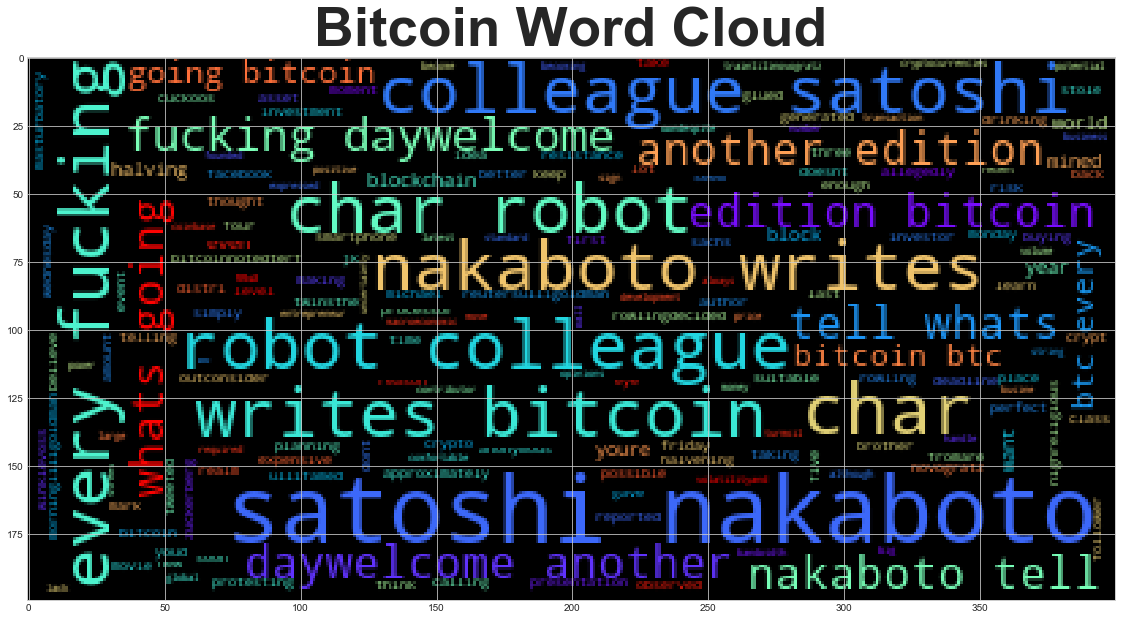

In [156]:
# Generate the Bitcoin word cloud
big_string = ' '.join([btc for bits in bitcoin_df.Tokens for btc in bits])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

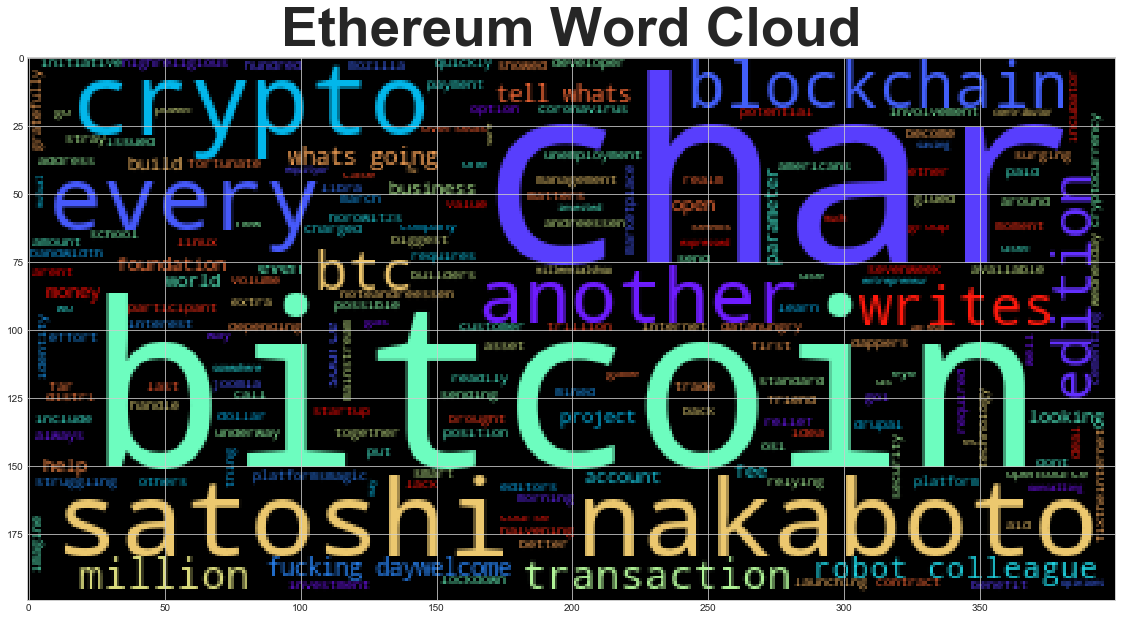

In [157]:
# Generate the Ethereum word cloud
big_string = ' '.join([eth for ets in ethereum_df.Tokens for eth in ets])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f